In [1]:
import os
import sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
import cv2 as cv
import glob
from skimage.feature import blob_log


In [2]:
#reading test images to convert them to grayscale and then to binary to extract information about stars

list_test_img = os.listdir("./test_img")


#converting images in to their corresponding binary form
for img_name in list_test_img:
    
    #reading image 
    source_name = "./test_img/" + img_name
    img = mpimg.imread(source_name, 0)
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    
    
    #performing otsu thresholding and Gaussian blurring
    blur_img = cv.GaussianBlur(gray_img,(1,1),0)
    ret,bin_img = cv.threshold(blur_img,127,255,cv.THRESH_BINARY)
    
    
    bin_img_name = "./processed_data_images/test_img/" + img_name
    #writing binary images to directory
    cv.imwrite(bin_img_name, bin_img)   
   


In [3]:
#list of constellation images
constellation_list = glob.glob("constellations_database_images/*.gif")

In [4]:
#first we load image and after that we convert the image to HSV Color

for img_name in constellation_list:

    #reading image and blurring it
    source_name = "./constellation_database_images/" + img_name
#     print(source_name)
    img = mpimg.imread(img_name , 0)
    img = cv.GaussianBlur(img,(5,5),0)

    #converting image to hsv form to select only red pixels 
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    
    
    #defining lower and upper range for star colors. Detecting red color regions
    #   100, 218, 139 , 120, 238, 219
    lower_range = np.array([100, 218, 139] )
    upper_range = np.array([120, 238, 219])
    
    
    
#   creating mask for the image
    mask = cv.inRange(hsv, lower_range, upper_range)

    s = img_name.split('/')
    new_s  = s[1].split('.')
    new_img_name = new_s[0] + '.jpg'
    new_img_name = './processed_data_images/data_base_img/' + new_img_name

    cv.imwrite(new_img_name, mask)   






In [5]:
bin_img_database = os.listdir("./processed_data_images/data_base_img/")

bin_img_test = os.listdir("./processed_data_images/test_img/")


/home/abhas/anaconda3/lib/python3.8/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/home/abhas/anaconda3/lib/python3.8/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/abhas/anaconda3/lib/python3.8/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/home/abhas/anaconda3/lib/python3.8/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


./templates/TriangulumAustralis.star
./templates/Andromeda-AND.star
./templates/Taurus.star
./templates/Vulpecula.star
./templates/UrsaMajor.star
./templates/Hydra.star
./templates/Cepheus.star
./templates/Draco.star
./templates/Sextans.star
./templates/Tucana.star
./templates/Aries.star
./templates/Aquarius.star
./templates/Norma.star
./templates/Lynx.star
./templates/Dorado.star
./templates/Eridanus.star
./templates/Monoceros.star
./templates/Lyra.star
./templates/Triangulum.star
./templates/Pegasus.star


<ipython-input-6-a2aed3c7ce46>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


./templates/Cassiopeia.star
./templates/SerpensCaput.star
./templates/Bootes.star
./templates/CanisMinor.star
./templates/Pyxis.star
./templates/Vela.star
./templates/Phoenix.star
./templates/Sagitta.star
./templates/Equuleus.star
./templates/Scorpius.star
./templates/Pavo.star
./templates/Fornax.star
./templates/Grus.star
./templates/Scutum.star
./templates/Reticulum.star
./templates/Capricornus.star
./templates/Caelum.star
./templates/Orion.star
./templates/SerpensCauda.star
./templates/Perseus.star
./templates/Camelopardalis.star
./templates/Apus.star
./templates/Octans.star
./templates/CanesVenatici.star
./templates/Ophiuchus.star
./templates/UrsaMinor.star
./templates/Virgo.star
./templates/Lacerta.star
./templates/Microscopus.star
./templates/Indus.star
./templates/Mensa.star
./templates/Leo.star
./templates/Gemini.star
./templates/Cancer.star
./templates/Musca.star
./templates/Libra.star
./templates/Telescopium.star
./templates/Pictor.star
./templates/LeoMinor.star
./templates/C

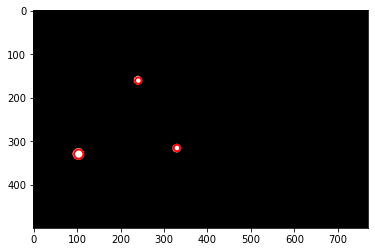

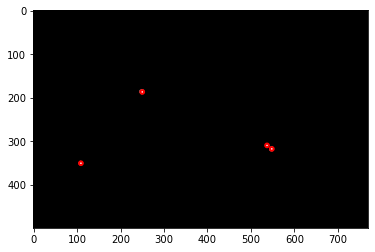

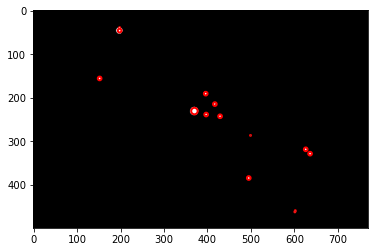

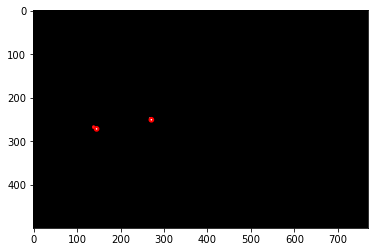

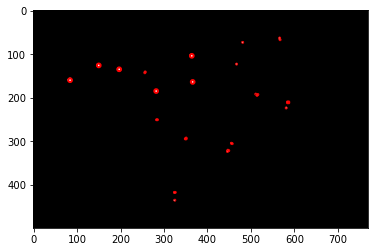

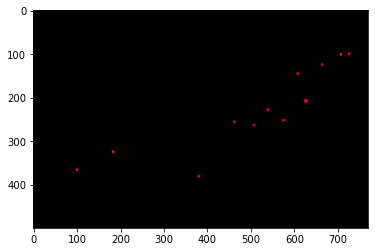

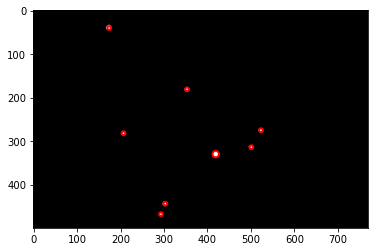

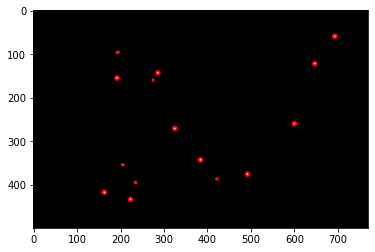

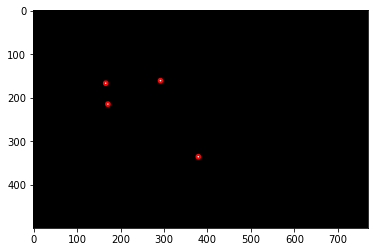

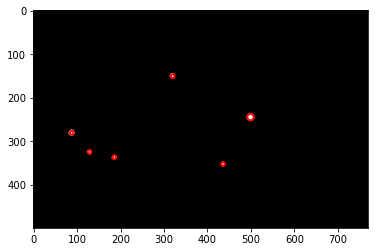

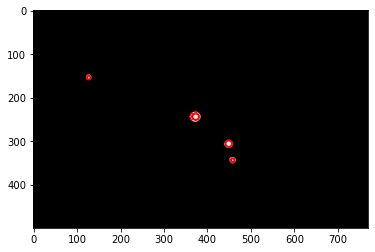

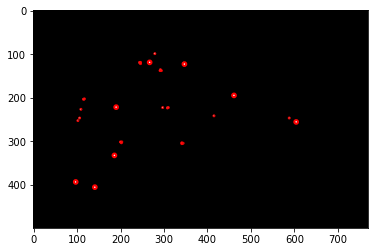

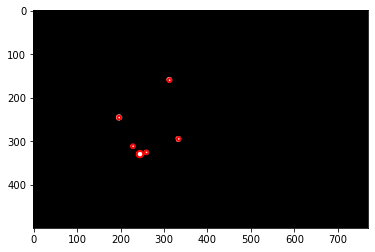

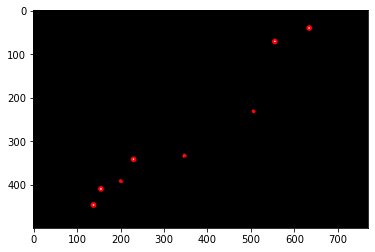

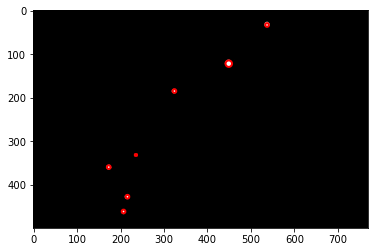

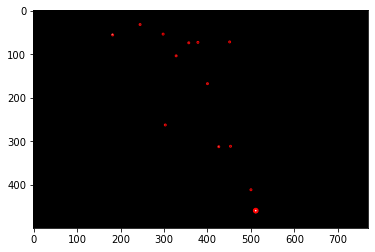

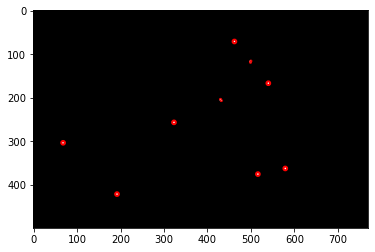

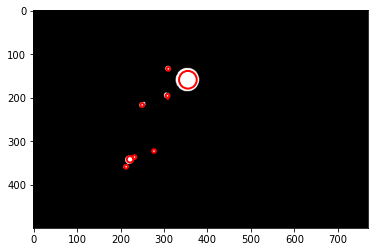

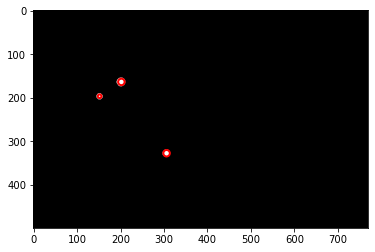

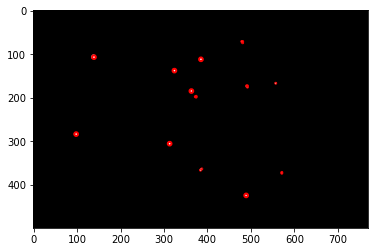

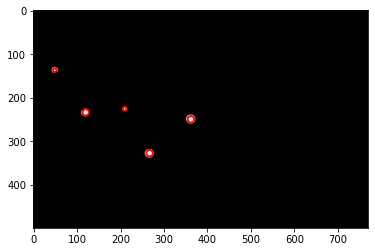

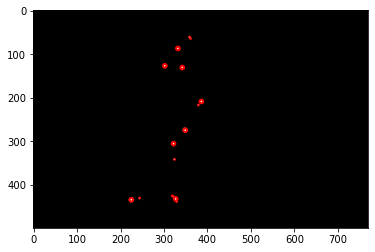

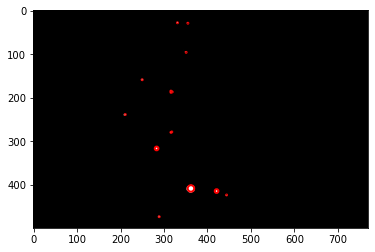

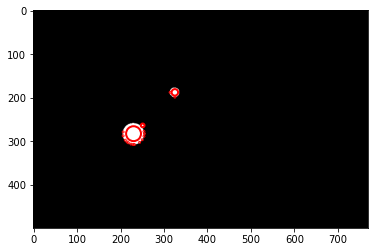

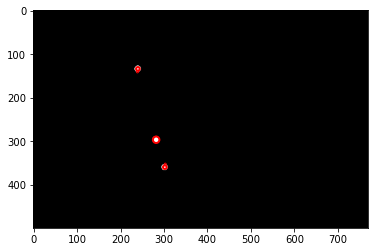

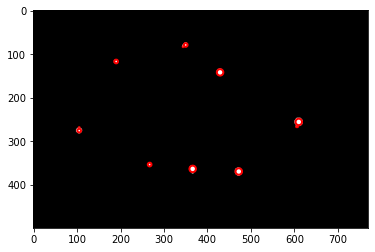

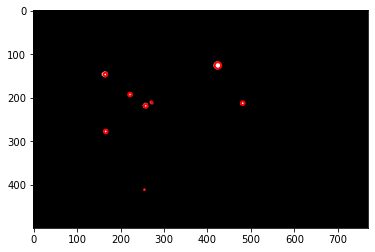

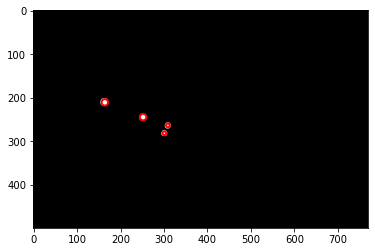

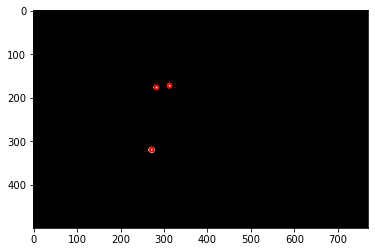

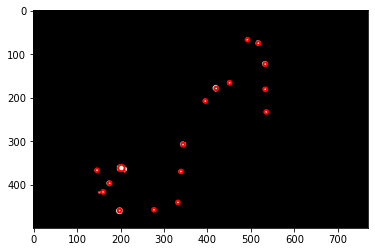

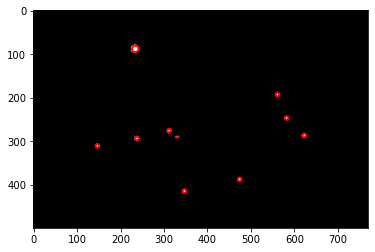

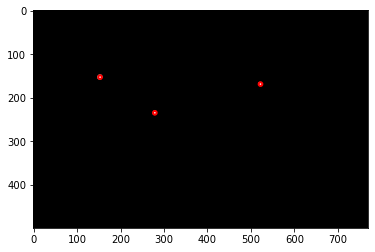

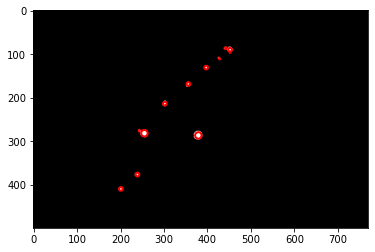

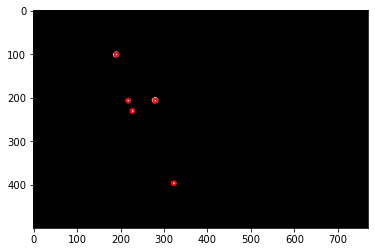

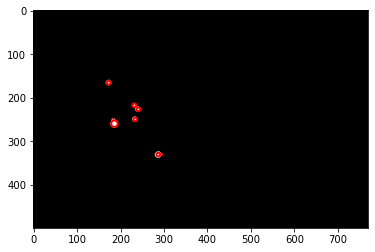

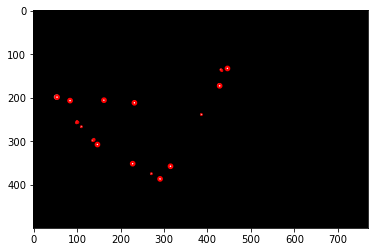

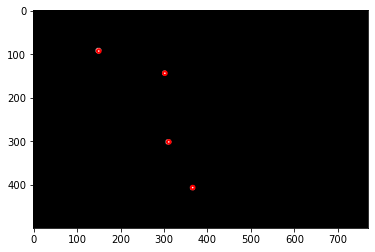

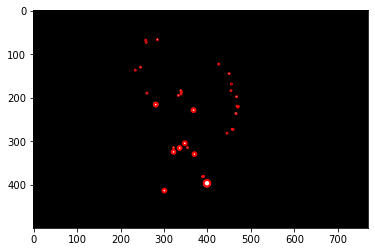

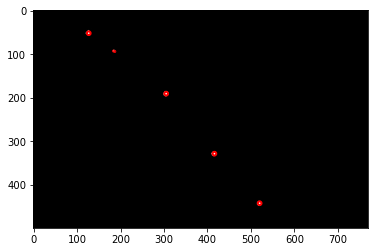

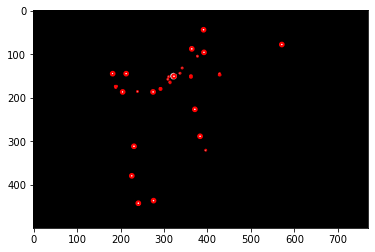

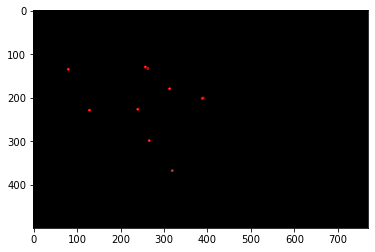

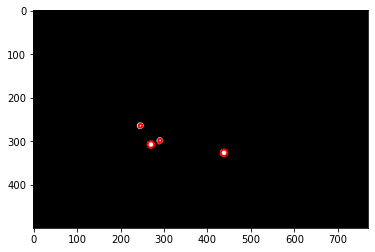

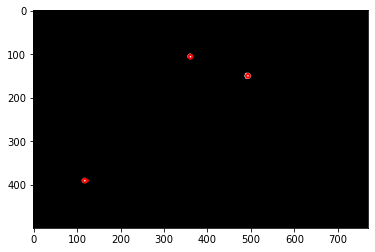

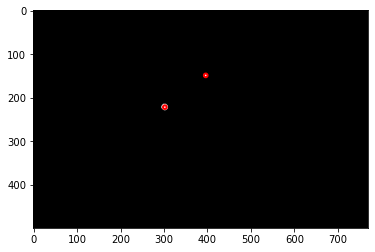

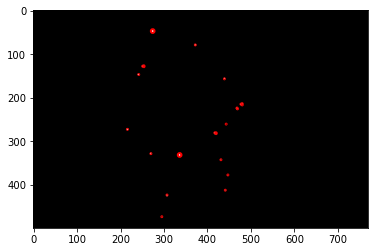

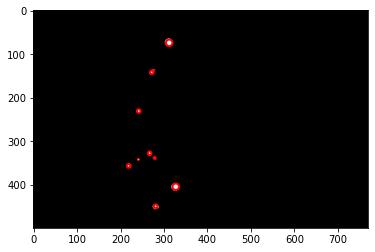

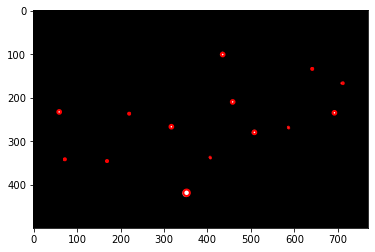

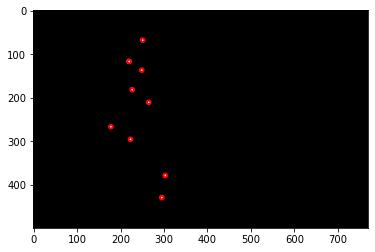

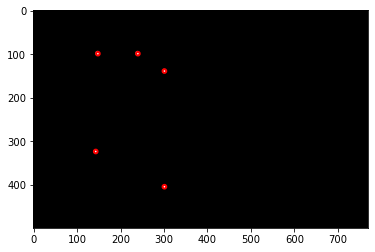

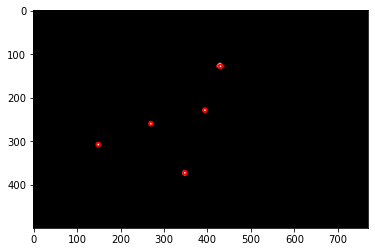

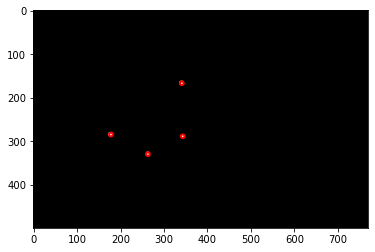

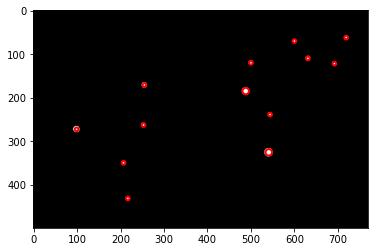

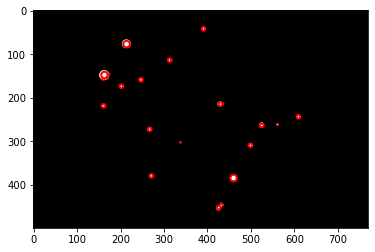

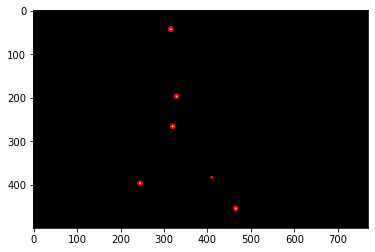

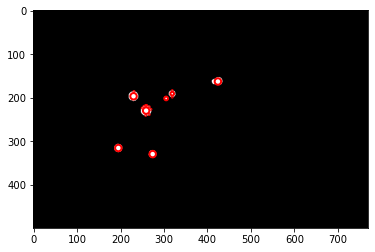

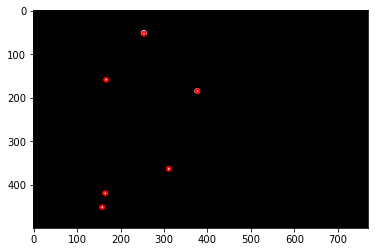

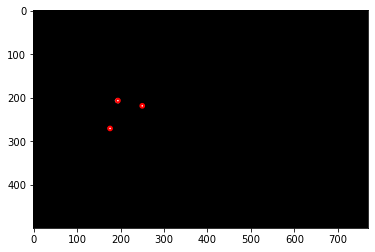

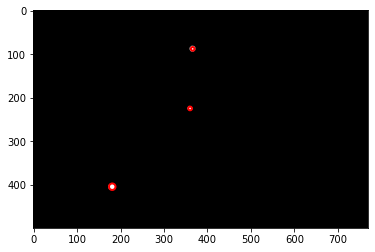

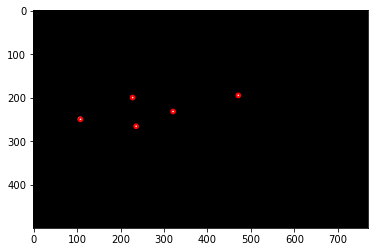

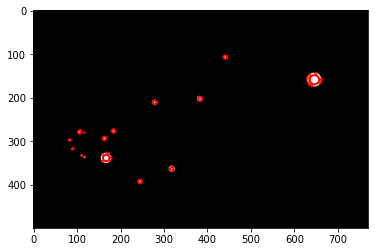

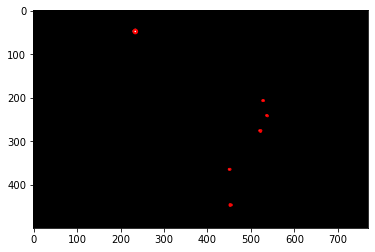

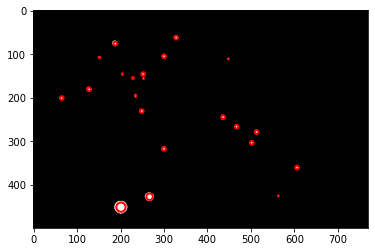

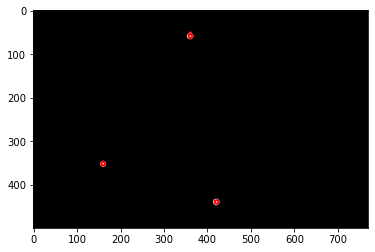

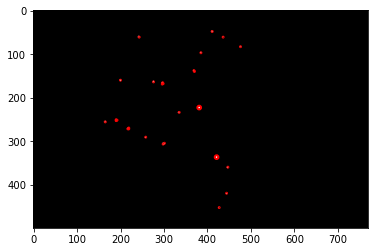

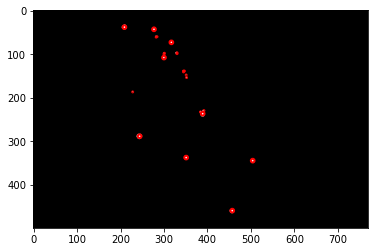

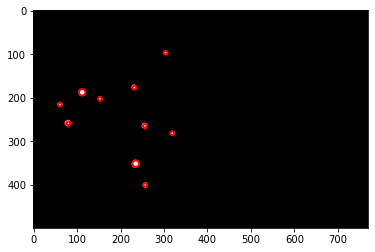

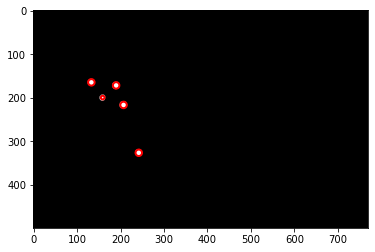

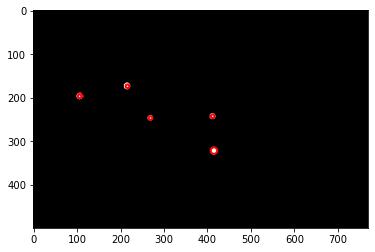

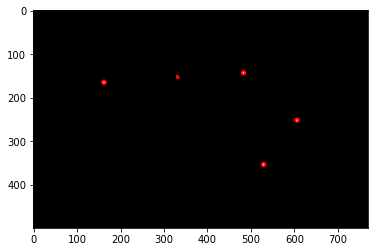

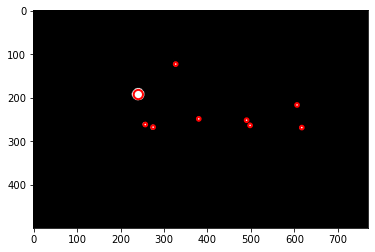

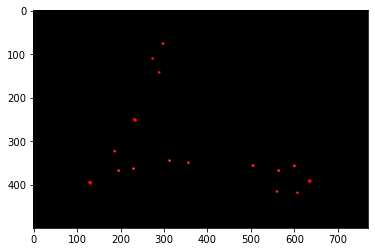

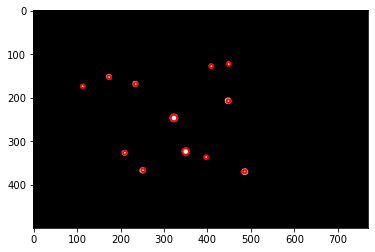

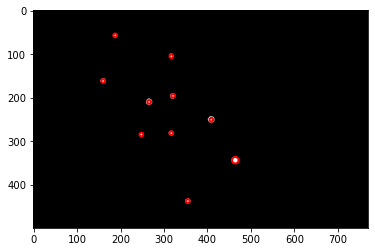

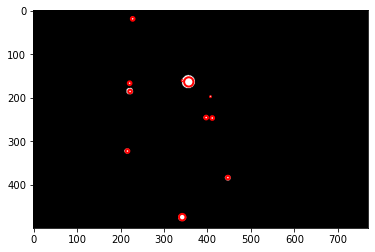

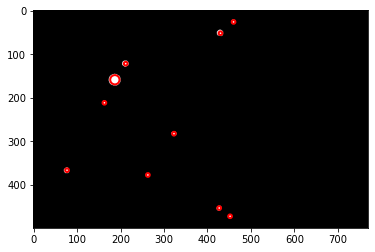

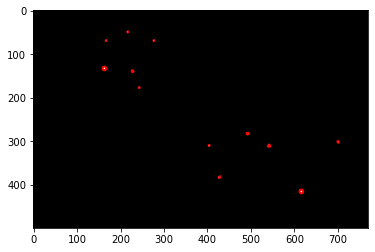

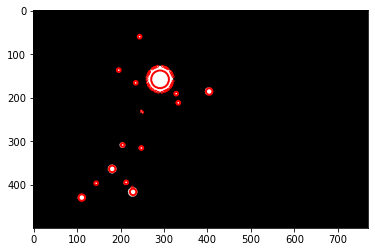

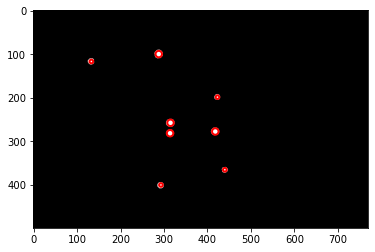

In [6]:
#storing the information from template images to template

for database_img_name in bin_img_database:
    
    source_name =  "./processed_data_images/data_base_img/" + database_img_name

    img = mpimg.imread(source_name, 0 )

    blobs = blob_log(img, max_sigma=30, num_sigma=10, threshold=.2)

    
    
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')
    ax.imshow(img, cmap = 'gray')

    for blob in blobs:
        y,x,r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_artist(c)

#     plt.imshow(img, cmap = 'gray')
#     plt.show()
    
    s = database_img_name.split('.')
    template_file = "./templates/" + s[0] + ".star"
    print(template_file)
    with open(template_file ,"w+") as fStarOut:
        for blob in blobs:
            y,x,r = blob
            fStarOut.write("{},{},{}\n".format(int(x),int(y),int(r)))


In [ ]:
#storing the information from template images to template
for test_img_name in bin_img_test:
    
    source_name =  "./processed_data_images/test_img/" + test_img_name

    img = mpimg.imread(source_name, 0 )

    blobs = blob_log(img, max_sigma=30, num_sigma=10, threshold=.2)

    
    
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')
    ax.imshow(img, cmap = 'gray')

    for blob in blobs:
        y,x,r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_artist(c)

#     plt.imshow(img, cmap = 'gray')
#     plt.show()
    
    s = test_img_name.split('.')
    template_file = "./test_templates/" + s[0] + ".star"
    print(template_file)
    with open(template_file ,"w+") as fStarOut:
        for blob in blobs:
            y,x,r = blob
            fStarOut.write("{},{},{}\n".format(int(x),int(y),int(r)))

./test_templates/con_PSC_001.star
./test_templates/hunter.star


In [ ]:

#NEIGHBOUR MATRIX for checking neighbourhs first





